#### Job Satisfaction

In this notebook, you will be exploring job satisfaction according to the survey results.  Use the cells at the top of the notebook to explore as necessary, and use your findings to solve the questions at the bottom of the notebook.

In [1]:
import pandas as pd
import numpy as np
import JobSatisfaction as t
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
bootcamp_df = df[df['TimeAfterBootcamp'].isnull()==False]
not_bootcamp_df = df[df['TimeAfterBootcamp'].isnull() == True]
bootcamp_df.shape

(882, 154)

In [15]:
bootcamp_df['Gender'].value_counts()/ (bootcamp_df.shape[0] - sum(bootcamp_df['Gender'].isnull()))

Male                                  0.848980
Female                                0.137415
Other                                 0.005442
Gender non-conforming                 0.005442
Transgender; Gender non-conforming    0.001361
Transgender                           0.001361
Name: Gender, dtype: float64

In [19]:
not_bootcamp_df['Gender'].value_counts()/ (not_bootcamp_df.shape[0] - sum(not_bootcamp_df['Gender'].isnull()))

Male                                                       0.906776
Female                                                     0.071376
Other                                                      0.005667
Gender non-conforming                                      0.004107
Male; Other                                                0.003450
Female; Transgender                                        0.002300
Male; Gender non-conforming                                0.001561
Transgender                                                0.001561
Female; Gender non-conforming                              0.000903
Male; Female                                               0.000411
Male; Female; Transgender; Gender non-conforming; Other    0.000329
Transgender; Gender non-conforming                         0.000329
Male; Transgender                                          0.000329
Female; Transgender; Gender non-conforming                 0.000246
Male; Female; Transgender; Gender non-conforming

In [20]:
bootcamp_df['FormalEducation'].value_counts()/ (bootcamp_df.shape[0] - sum(bootcamp_df['FormalEducation'].isnull()))

Bachelor's degree                                                    0.485261
Master's degree                                                      0.239229
Some college/university study without earning a bachelor's degree    0.148526
Secondary school                                                     0.066893
Doctoral degree                                                      0.024943
I prefer not to answer                                               0.014739
Professional degree                                                  0.009070
I never completed any formal education                               0.005669
Primary/elementary school                                            0.005669
Name: FormalEducation, dtype: float64

In [21]:
not_bootcamp_df['FormalEducation'].value_counts()/ (not_bootcamp_df.shape[0] - sum(not_bootcamp_df['FormalEducation'].isnull()))

Bachelor's degree                                                    0.421021
Master's degree                                                      0.215807
Some college/university study without earning a bachelor's degree    0.150274
Secondary school                                                     0.118990
Doctoral degree                                                      0.029034
Primary/elementary school                                            0.021899
I prefer not to answer                                               0.021734
Professional degree                                                  0.013557
I never completed any formal education                               0.007684
Name: FormalEducation, dtype: float64

In [23]:
bootcamp_df['TimeAfterBootcamp'].value_counts() / bootcamp_df.shape[0]

I already had a job as a developer when I started the program    0.479592
I got a job as a developer before completing the program         0.104308
One to three months                                              0.096372
Immediately upon graduating                                      0.095238
I haven't gotten a job as a developer yet                        0.072562
Less than a month                                                0.053288
Four to six months                                               0.035147
Six months to a year                                             0.032880
Longer than a year                                               0.030612
Name: TimeAfterBootcamp, dtype: float64

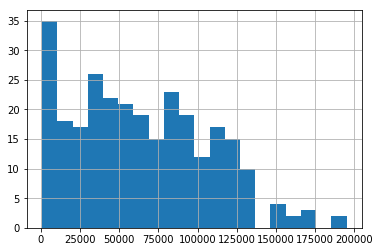

In [24]:
bootcamp_df['Salary'].hist(bins=20);

# Job Satisfaction 

In [27]:
df[df['JobSatisfaction'].isnull()==False].mean()

Respondent                    9473.067921
CareerSatisfaction               7.410838
JobSatisfaction                  7.000721
HoursPerWeek                     3.331964
StackOverflowSatisfaction        8.385003
Salary                       58266.522402
ExpectedSalary                        NaN
dtype: float64

In [35]:
df['JobSatisfaction'].isnull().mean()

0.20149722542142184

In [37]:
df['EmploymentStatus'].value_counts()

Employed full-time                                      13655
Independent contractor, freelancer, or self-employed     1866
Employed part-time                                       1168
Not employed, and not looking for work                   1066
Not employed, but looking for work                        906
I prefer not to say                                       381
Retired                                                    60
Name: EmploymentStatus, dtype: int64

In [3]:
df.groupby('EmploymentStatus').mean()['JobSatisfaction']

EmploymentStatus
Employed full-time                                      6.980608
Employed part-time                                      6.846154
I prefer not to say                                          NaN
Independent contractor, freelancer, or self-employed    7.231985
Not employed, and not looking for work                       NaN
Not employed, but looking for work                           NaN
Retired                                                      NaN
Name: JobSatisfaction, dtype: float64

In [7]:
df.groupby('CompanySize').mean()['JobSatisfaction'].sort_values()

CompanySize
10,000 or more employees    6.793617
5,000 to 9,999 employees    6.832155
1,000 to 4,999 employees    6.908506
20 to 99 employees          6.997039
Fewer than 10 employees     7.025719
100 to 499 employees        7.029324
500 to 999 employees        7.029967
10 to 19 employees          7.035739
I don't know                7.054622
I prefer not to answer      7.284946
Name: JobSatisfaction, dtype: float64

#### Question 1

**1.** Use the space above to assist in matching each variable (a, b, c, d, e, f, g, or h) as the appropriate key that describes the value in the **job_sol_1** dictionary.

In [10]:
a = 0.734
b = 0.2014
c = 'full-time'
d = 'contractors'
e = 'retired'
f = 'yes'
g = 'no'
h = 'hard to tell'

job_sol_1 = {'The proportion of missing values in the Job Satisfaction column': b,
             'According to EmploymentStatus, which group has the highest average job satisfaction?': d,#letter here, 
             'In general, do smaller companies appear to have employees with higher job satisfaction?': f }
             
t.jobsat_check1(job_sol_1)

Nice job! That's what we found as well!


#### Question 2

**2.** Use the space above to assist in matching each variable (a, b, c) as the appropriate key that describes the value in the **job_sol_2** dictionary. Notice you can have the same letter appear more than once.

In [27]:
a = 'yes'
b = 'no'
c = 'hard to tell'

job_sol_2 = {'Do individuals who program outside of work appear to have higher JobSatisfaction?': a ,
             'Does flexibility to work outside of the office appear to have an influence on JobSatisfaction?': a, 
             'A friend says a Doctoral degree increases the chance of having job you like, does this seem true?': a}
             
t.jobsat_check2(job_sol_2)

Nice job! That's what we found as well!


In [18]:
df.groupby('ProgramHobby').mean()['JobSatisfaction'].sort_values()

ProgramHobby
No                                           6.874806
Yes, I program as a hobby                    6.927150
Yes, I contribute to open source projects    7.158649
Yes, both                                    7.189316
Name: JobSatisfaction, dtype: float64

In [22]:
df.groupby('HomeRemote').mean()['JobSatisfaction'].sort_values()

HomeRemote
Never                                                      6.697127
It's complicated                                           6.942053
More than half, but not all, the time                      6.973684
A few days each month                                      7.096694
About half the time                                        7.125737
Less than half the time, but at least one day each week    7.143786
All or almost all the time (I'm full-time remote)          7.405421
Name: JobSatisfaction, dtype: float64

In [23]:
df.groupby('FormalEducation').mean()['JobSatisfaction'].sort_values()

FormalEducation
Bachelor's degree                                                    6.900293
Primary/elementary school                                            6.946237
Master's degree                                                      6.977356
I never completed any formal education                               7.000000
Professional degree                                                  7.075893
Some college/university study without earning a bachelor's degree    7.151268
I prefer not to answer                                               7.211679
Secondary school                                                     7.219512
Doctoral degree                                                      7.438492
Name: JobSatisfaction, dtype: float64